<a href="https://colab.research.google.com/github/VishwakarmaMithun/PythonScripts/blob/main/FeatureSelectionChiSquarePvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scipy

In [5]:
from scipy.stats import chi2_contingency

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
variable  = ['pclass','survived','sex','sibsp','parch','embarked']

In [11]:
data = pd.read_csv("/content/titanic.csv",usecols=variable)

In [12]:
data.head()

,survived,pclass,sex,sibsp,parch,embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [14]:
X_train,X_Test,y_train,y_test = train_test_split(data.drop("survived",axis=1),data['survived'],test_size=0.3,random_state=0,)

In [16]:
X_train.shape, X_Test.shape

((623, 5), (268, 5))

In [21]:
c= pd.crosstab(y_train,X_train['sex'])

In [22]:
c

sex,female,male
survived,,
0,53,328
1,162,80


In [23]:
chi2_contingency(c)

Chi2ContingencyResult(statistic=181.82121569538316, pvalue=1.9399290790723904e-41, dof=1, expected_freq=array([[131.4847512, 249.5152488],
       [ 83.5152488, 158.4847512]]))

In [27]:
chi_ls =[]
for feature in X_train.columns:
  c =pd.crosstab(y_train,X_train[feature])
  p_value = chi2_contingency(c)[1]
  chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature important  based on chi-square test')

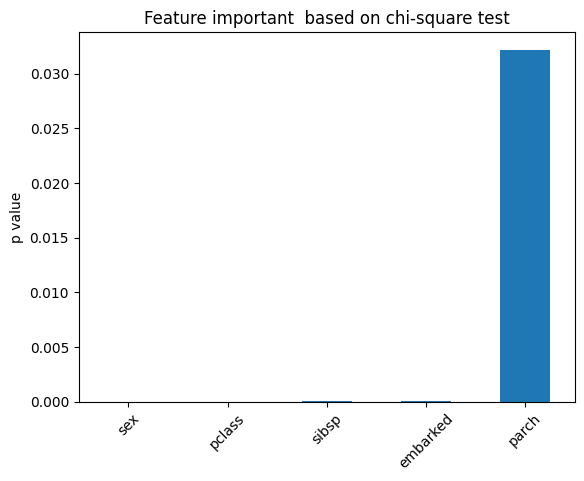

In [32]:
pd.Series(chi_ls ,index =X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature important  based on chi-square test')

In [36]:
selected  = pd.Series(chi_ls,index=X_train.columns).sort_values(ascending =True)[0:3].index

In [37]:
selected

Index(['sex', 'pclass', 'sibsp'], dtype='object')

In [38]:
X_train = X_train[selected]

In [40]:
X_test = X_Test[selected]